# Flipping coins with Professor Mittens

## Outline and housekeeping

The material in this notebook covers four topics: binomial distributions, the central limit theorem, outliers in data and invalid model assumptions. _You will have approximately 15 minutes to work through each part, after which we will go through the answers together._ Exercises marked as "extension" may be more challenging, so you can skip them on a first reading if you feel they will take too much time.

This notebook is available on github [here](https://github.com/aezarebski/aas-extended-examples). If you find errors or would like to suggest an improvement, feel free to create an issue.

## Introduction

In this lab we will look at the binomial distribution, central limit theorem, and analyse two data sets collected by [Professor Mittens](https://en.wikipedia.org/wiki/Mittens_(cat)) helping him interrogate the bais in the results of coin flips. Some of the questions are open-ended by design. Partial solutions will be distributed at the end of the session. The imports below are used in the provided solutions, consider these suggestions, not constraints. The answers use `altair` but you can use any plotting library you are comfortable with.

In [11]:
import pandas as pd
from scipy import stats
import altair as alt
from typing import List, Any, Tuple
from functools import reduce
from itertools import repeat
import math as math
import numpy as np
import matplotlib.pyplot as plt

## Parameter estimation of the binomial distribution

Bernoulli and binomial random variables are the typical way to represent the outcome of coin flips. Below we consider estimates of the probability of heads based on a known number of successes in a given number of trials and also a confidence interval (CI) for this based on the Wald method will be given.

Let $X$ be a binomial random variable (RV) which results from the number of heads when a coin is flipped $n$ times and the probability of coming up heads is $p$. For the time being we will assume that $n$ is know. The expected value of $X$ is $np$. So a simple way to estimate $p$ is to divide the number of heads, $X$, by the number of flips, $n$. This gives the estimate 

$$
\hat{p} = X / n.
$$

It turns out that this is a very sensible thing to do. The resulting estimate is called the maximum likelihood estimate (MLE) of $p$. It is also the result that one obtains via [the method of moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)).

Given an estimator though, we want to know how confident we are in the estimate it produces. Here we will use the Wald method to get the $95\%$ CI. It is a very simple method but is acceptable when we have a fair bit of data. The estimated standard error of $\hat{p}$ is $\sqrt{\hat{p}(1-\hat{p})/n}$, so the Wald CI is given by

$$
\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $z$ is the appropriate quantile of the standard normal distribution. In the case of a $95\%$ distribution this is just $1.96$.

This is stated on the [wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution#Estimation_of_parameters) but there is also a reasonably clear description in [All of Statistics](https://link.springer.com/book/10.1007/978-0-387-21736-9) which you can get via SOLO. You can also find reasonable treatments of Wald CIs in both of those resources.

### Exercise 1 part I

Professor Mittens is not very familiar with the binomial distribution and wants you to justify the estimator used above. Convince yourself that the estimate given above, $X/n$, is a sensible choice. Prove that it is either the MLE or the method of moments estimator for $p$. State the limitations on the estimator we are using for the CI.

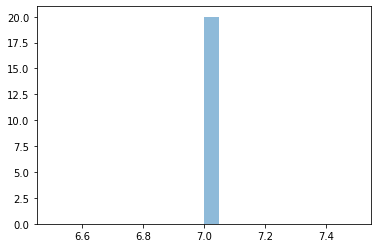

In [14]:
p = 0.5
n = 10
#help(np.random.binomial)
population = np.random.binomial(n, p)
population
plt.hist(population, bins=20, density = True, alpha=0.5);

### Exercise 1 part II

Implement a function called `wald_estimate_and_ci` which takes two arguments: `num_trials` which is $n$ in the description above, and `num_success` which is $X$ above. The function should return `(p_hat,(wald_lower,wald_upper))` where `p_hat` is $\hat{p}$ and `wald_x` are the limits on the $95\%$ CI using the Wald method.

### Exercise 2 part I

Look up how to simulate a random variable from a binomial distribution (it tells you [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) if you want to use `scipy`). Then simulate a binomial random variable with $n=100$ and $p=0.6$. Then use the value and the `wald_estimate_and_ci` function to see how well you can estimate $p$. Write a couple of sentences to explain this.

### Exercise 2 part II

Repeat the process about 100000 times and see what proportion of the CIs capture the true value of $p$. Is it what you expect? Write a couple of sentences to explain what you found.

### Exercise 2 part III

Are credible intervals and confidence intervals the same thing?

## Central limit theorem

The central limit theorem tells us about the limiting distribution of the sample mean for distribution for an IID sample with a finite variance. It underpins many results in statistics and is important for reasoning about stochastic processes.

### Exercise 3 part I (Extension)

Professor Mittens *really* likes to sound fancy and use the name of important theorems. Write down a statement of the law of large numbers. Write down a statement of the central limit theorem. Make sure you understand what each of them tells you.

In [ ]:
# Law of large numbers 

'''
Law of large numbers - As a sample get's really large the samle mean becomes a more accurate prediction 
of the population mean 


CLT - As the number of sample means tends to infinity 
the distribution of the sample means is normally distributed centered around the population mean 

-> it quantifies how much the sample average will fluctuate from the true value 
'''

### Exercise 3 part II

To see that the distribution of the sample mean converges to a normal distribution we will do a simulation study and compare the results with a Q-Q plot to see if it looks normally distributed. This will also demonstrate how to construct a Q-Q plot from first principles, not that you really want to do that. Carry out the following steps:

1. Write down the distribution of the sample mean given an IID sample of exponential random variables with rate $1/5$.
2. Generate 500 sample means each based on a sample of 100 exponential random variables
3. Make a visualisation of the distribution of the data (e.g., a KDE or histogram) and overlay the CLT approximation.
4. Make a Q-Q plot to see if the sample means do appear to follow a normal distribution

In [18]:

population = np.random.exponential(1/5, 100)
n = 100
population
#s1 = np.random.choice(population, n)
population.mean()

0.2


## Experimental results: flipping coins in series

Professor Mittens asked 15 of his students to each take turns flipping a coin 30 times and recording how many heads they got. He has a sneaking suspicion that some of the students did not actually do this properly, that they just wrote down some garbage and went to lunch early. We will help Mittens work out whether the coin that was used was fair, i.e. has an equal chance of showing heads or tails.

### Exercise 3 part I

Read the data in `experiement1.csv` into a `DataFrame`. Use some of the commands you've seen in lectures to inspect the data, noting that it may not be in the optimal format for analysis.

In [36]:
file = "Documents/MSc_Social_Data_Science/Local_Repo/Fundamentals_of_Social_Data_Science_Python/aas-extended-examples/example-1/experiment1.csv"
ex1_df = pd.DataFrame(pd.read_csv("experiment1.csv"))

display(ex1_df.head())
print(ex1_df.dtypes)
#import os
#print(os.getcwd())

,name,flip_number,outcome
0,0,1,1
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


name           int64
flip_number    int64
outcome        int64
dtype: object


### Exercise 3 part II

Compute the point estimate and CI using the function you wrote above. Write a sentence explaining whether you think the coin is a _fair_ coin given the results you have just obtained.

In [33]:
print(ex1_df["outcome"].mean())

head_counts = ex1_df.drop(columns = "flip_number"),groupby("name").sum()
head_counts["name"] = head_counts.index.copy()
#Check difference if .copy() is used/not used


0.49333333333333335


### Exercise 3 part III

Generate a histogram of the number of heads from each student. As an extension, include the binomial distribution supported by your estimate that is most amenable to large value outcomes.

### Exercise 4 part I

It looks like there might be a couple of strange points in this dataset as Mittens suspected. Using the upper bound on $p$ calculate the probability of someone getting all heads. Write a couple of sentences explaining whether you think it is reasonable to remove those data points.

### Exercise 4 part II

Remove the outliers and repeat the process of plotting the data and estimating the parameters and CI. Once you have done this, plot the distribution of the estimated binomial distribution on top of the histogram. Write a couple of sentences explaining what you think about the coin now.

## Experimental results: flipping coins in parallel

After the success of his first experiment, Mittens was lauded as a statistical wizard. The royal mint has become interested and is providing additional funds to obtain an additional 49 coins and repeat the experiment to gather more data about the fascinating topic of coin bias. Now he gives each of 50 students a coin each and asks them to flip the coin 30 times and record the results. We will help Mittens work out whether the coins are fair.

### Excercise 5 part I

Do we need to change anything about how we analyse this data? If so, why, if not, why not? **Hint:** there are good arguments that can be given for each answer. Once you have answered one way, try to answer the other way. 

### Exercise 5 part II

Using the data in `experiment2.csv` explore the data set using the methodology devised above and write a couple of sentences to explain what you found.

In [42]:
ex2_df = pd.DataFrame(pd.read_csv("experiment2.csv"))

display(ex2_df.head())
print(ex2_df.dtypes)
#import os
#print(os.getcwd())

,name,flip_number,outcome
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


name           int64
flip_number    int64
outcome        int64
dtype: object


In [46]:
head_counts = ex2_df.drop(columns="flip_number")
head_counts = head_counts.groupby("name").sum()
#head_counts["name"] = 
print(head_counts.index)
#.groupby("name").sum()


print("Original")
display(ex2_df.head())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64', name='name')
Original


,name,flip_number,outcome
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


In [48]:
head_counts["name"] = head_counts.index.copy()
display(head_counts.head())

,outcome,name
name,,
0,7,0
1,7,1
2,4,2
3,7,3
4,4,4


### Exercise 5 part III

Visualise the number of heads each student got and compare the variance in this to what is predicted by theory. Revise your answer to part I of this exercise.

### Exercise 5 part IV (Extension)

Consider how you might analyse this data. Over the following weeks you will learn a couple of approaches.

## Epilogue

Professor Mittens' work was published in a top tier journal and he was lauded as a statistical wizard. Rumour has it he will soon be elected to the British Acadmey.